# SMOTE Test 

A quick test on SMOTE with ML table 1 and several ML algorithms

The approach below is likely subject to overtraining and should be revisited

In [1]:
#general imports
import pandas as pd
import boto3
import numpy as np
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier 
pd.set_option('display.max_columns', 50)
%matplotlib inline 

In [2]:
#load in the csvs
#TODO For Team: enter the credentails below to run
S3_Key_id=''
S3_Secret_key=''

def pull_data(Key_id, Secret_key, file):
    """
    Function which CJ wrote to pull data from S3 
    """
    BUCKET_NAME = "gtown-wildfire-ds"
    OBJECT_KEY = file
    client = boto3.client(
        's3',
        aws_access_key_id= Key_id,
        aws_secret_access_key= Secret_key)
    obj = client.get_object(Bucket= BUCKET_NAME, Key= OBJECT_KEY) 
    file_df = pd.read_csv(obj['Body'])
    return (file_df)

#Pull in the firms and scan df
file = 'MLTable1.csv'
df = pull_data(S3_Key_id, S3_Secret_key, file)
df.head()

,Unnamed: 0,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,1,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3]:
#drop unnamed
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
print(df.shape)
df['FIRE_DETECTED'].value_counts()

(1396691, 37)


False    1357647
True       39044
Name: FIRE_DETECTED, dtype: int64

In [6]:
#start with doubling the TRUE size by sampling 
df_class_F = df[df['FIRE_DETECTED'] == False] #majority class
df_class_T = df[df['FIRE_DETECTED'] == True] #minority class
df = pd.concat([df, df_class_T])
print(df.shape)
df['FIRE_DETECTED'].value_counts()

(1513823, 37)


False    1357647
True      156176
Name: FIRE_DETECTED, dtype: int64

The TRUE labels now appear to be doubled. Now splitting the data and running a few ML algorithms.

In [7]:
#seperate data sets as labels and features
X = df.drop('FIRE_DETECTED', axis=1)
y = df['FIRE_DETECTED']

In [8]:
#train test splitting of data
#common syntax here is to use X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state is a random seed

In [9]:
def run_model(model):
    """
    function to run a model on partial df and get the results
    """
    model.fit(X_train, y_train) #fits the model using training data
    pred = model.predict(X_test) #predict the test data now

In [10]:
def run_and_visualize(model):
    """
    function which runs the model on X_train and y_train and scores based on X_test, y_test 
    Displays results using yellowbricks classification report 
    """
    run_model(model)
    visualizer = ClassificationReport(
    model, 
    classes=['No_Fire', 'Fire'], 
    cmap="Reds", 
    support=True,
    size=(600, 360)
    )
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    print(str(model) + ':') #prints the model type
    visualizer.show() 

C:\Users\anderb4\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier():


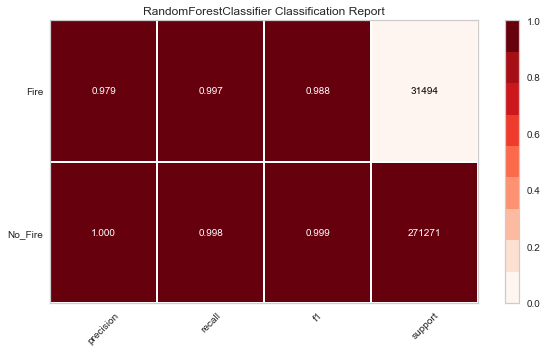

C:\Users\anderb4\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


BaggingClassifier():


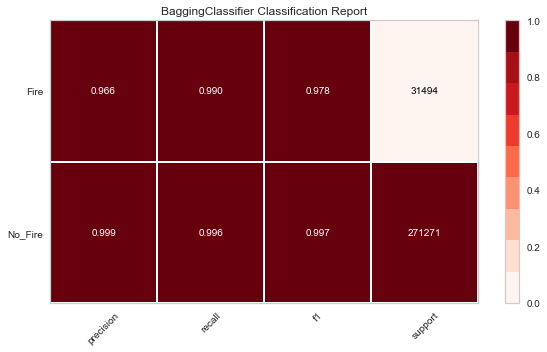

C:\Users\anderb4\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


ExtraTreesClassifier():


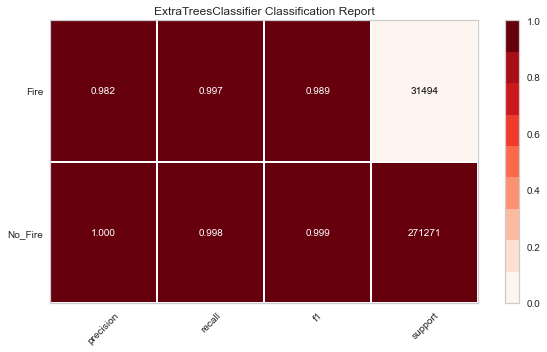

In [12]:
models = [
    RandomForestClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    run_and_visualize(model)

These models show very high evidence of overfitting, the scores are way too accurate to be believeable in this context. 